(np.float64(-0.5), np.float64(236.5), np.float64(157.5), np.float64(-0.5))

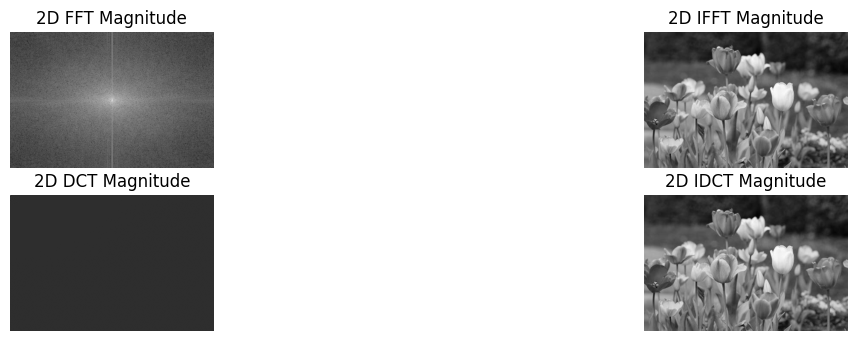

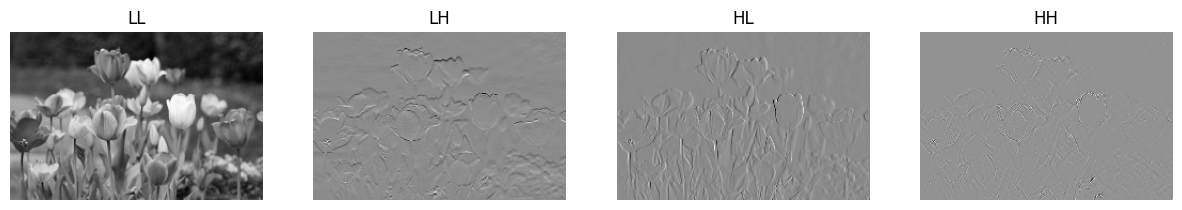

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import pywt

list_path = os.getcwd().split(os.sep)
list_path.pop()
list_path.pop()
list_path.append('images')
image_path = os.sep.join(list_path) + os.sep + 'tulip.jpeg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


def fft2d(image):
    return np.fft.fft2(image)

def ifft2d(image):
    return np.fft.ifft2(image)

def dct2d(image):
    return cv.dct(image.astype(np.float32))

def idct2d(image):
    return cv.idct(image.astype(np.float32))

def dwt2d(image):
    coeffs = pywt.dwt2(image, 'haar')
    return coeffs

def idwt2d(coeffs):
    return pywt.idwt2(coeffs, 'haar')

plt.figure(figsize=(15,6))

fft_result = fft2d(img)

fft_shifted = np.fft.fftshift(fft_result)
magnitude = np.log(np.abs(fft_shifted) + 1)

ifft_result = ifft2d(fft_result)
ifft_magnitude = np.abs(ifft_result)

dct_result = dct2d(img)
idct_result = idct2d(dct_result)
idct_magnitude = np.abs(idct_result)

coeff = dwt2d(img)
LL, (LH, HL, HH) = coeff

plt.subplot(3, 2, 1)
plt.title("2D FFT Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("2D IFFT Magnitude")
plt.imshow(ifft_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title("2D DCT Magnitude")
plt.imshow(dct_result, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("2D IDCT Magnitude")
plt.imshow(idct_magnitude, cmap='gray')
plt.axis('off')

plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.title("LL")
plt.imshow(LL, cmap='gray')
plt.axis('off')

plt.subplot(1,4,2)
plt.title("LH")
plt.imshow(LH, cmap='gray')
plt.axis('off')

plt.subplot(1,4,3)
plt.title("HL")
plt.imshow(HL, cmap='gray')
plt.axis('off')

plt.subplot(1,4,4)
plt.title("HH")
plt.imshow(HH, cmap='gray')
plt.axis('off')




